In [2]:
from google.colab import files
files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


{'Google_Stock_Price_Test.csv': b'Date,Open,High,Low,Close,Volume\r\n1/3/2017,778.81,789.63,775.8,786.14,"1,657,300"\r\n1/4/2017,788.36,791.34,783.16,786.9,"1,073,000"\r\n1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"\r\n1/6/2017,795.26,807.9,792.2,806.15,"1,640,200"\r\n1/9/2017,806.4,809.97,802.83,806.65,"1,272,400"\r\n1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"\r\n1/11/2017,805,808.15,801.37,807.91,"1,065,900"\r\n1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"\r\n1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"\r\n1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"\r\n1/18/2017,805.81,806.21,800.99,806.07,"1,294,400"\r\n1/19/2017,805.12,809.48,801.8,802.17,"919,300"\r\n1/20/2017,806.91,806.91,801.69,805.02,"1,670,000"\r\n1/23/2017,807.25,820.87,803.74,819.31,"1,963,600"\r\n1/24/2017,822.3,825.9,817.82,823.87,"1,474,000"\r\n1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"\r\n1/26/2017,837.81,838,827.01,832.15,"2,973,900"\r\n1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"\r

In [23]:
!pip install -U tensorflow-addons
!pip install -q "tqdm>=4.36.1"

import glob
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import tensorflow.keras as tf
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler

Requirement already up-to-date: tensorflow-addons in /usr/local/lib/python3.6/dist-packages (0.12.1)


In [5]:
import tqdm

#quietly deep-reload tqdm
import sys
from IPython.lib import deepreload 

stdout = sys.stdout
sys.stdout = open('junk','w')
deepreload.reload(tqdm)
sys.stdout = stdout

# Printing Versions
print(f"tf - {tf.__version__}")
print(f"tqdm - {tqdm.__version__}")

tf - 2.4.0
tqdm - 4.41.1


In [6]:
file = glob.glob('*Train.csv')
df = pd.read_csv(*file)
pprint(df.head())
print(f"\nThe Dimension of the dataset is - {df.shape}")

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800

The Dimension of the dataset is - (1258, 6)


In [7]:
traning_set = df.iloc[:, 1:2].values
print(traning_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [8]:
mms = MinMaxScaler(feature_range = (0, 1))
scaled_traning_set = mms.fit_transform(traning_set)
print(scaled_traning_set)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [9]:
# Making Timestamp
X_train = []
Y_train = []
for i in range(60, len(scaled_traning_set)):
    X_train.append(scaled_traning_set[i-60:i, 0])
    Y_train.append(scaled_traning_set[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(f"X_train Dimenstion - {X_train.shape}")
print("-------------")
print(f"Y_train Dimenstion - {Y_train.shape}")

X_train Dimenstion - (1198, 60)
-------------
Y_train Dimenstion - (1198,)


In [10]:
# Adding new timestamp
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f"New X_train Dimenstion - {X_train.shape}")

New X_train Dimenstion - (1198, 60, 1)


In [11]:
# Building the Model
model = tf.models.Sequential()

# First LSTM Layer
model.add(tf.layers.LSTM(units = 50,
                         return_sequences = True,
                         input_shape = (X_train.shape[1], 1)))
model.add(tf.layers.Dropout(0.2))

# Second LSTM Layer
model.add(tf.layers.LSTM(units = 50, 
                         return_sequences = True))
model.add(tf.layers.Dropout(0.2))

# Third LSTM Layer
model.add(tf.layers.LSTM(units = 50, 
                         return_sequences = True))
model.add(tf.layers.Dropout(0.2))

# Fourth LSTM Layer
model.add(tf.layers.LSTM(units = 50, 
                         return_sequences = False,))
model.add(tf.layers.Dropout(0.2))

# Adding the Dense Layer
model.add(tf.layers.Dense(units = 1))

# Compiling the Model Architecture
model.compile(optimizer = 'adam', 
              loss = 'mean_squared_error', 
              metrics = ['accuracy'])

# Printing the Model architectuer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [12]:
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

# Training the Model
model.fit(X_train, Y_train, 
          epochs = 100,
          batch_size = 32,
          verbose = 0,
          callbacks = [tqdm_callback]
         )

Epoch 1/100



Epoch 2/100



Epoch 3/100



Epoch 4/100



Epoch 5/100



Epoch 6/100



Epoch 7/100



Epoch 8/100



Epoch 9/100



Epoch 10/100



Epoch 11/100



Epoch 12/100



Epoch 13/100



Epoch 14/100



Epoch 15/100



Epoch 16/100



Epoch 17/100



Epoch 18/100



Epoch 19/100



Epoch 20/100



Epoch 21/100



Epoch 22/100



Epoch 23/100



Epoch 24/100



Epoch 25/100



Epoch 26/100



Epoch 27/100



Epoch 28/100



Epoch 29/100



Epoch 30/100



Epoch 31/100



Epoch 32/100



Epoch 33/100



Epoch 34/100



Epoch 35/100



Epoch 36/100



Epoch 37/100



Epoch 38/100



Epoch 39/100



Epoch 40/100



Epoch 41/100



Epoch 42/100



Epoch 43/100



Epoch 44/100



Epoch 45/100



Epoch 46/100



Epoch 47/100



Epoch 48/100



Epoch 49/100



Epoch 50/100



Epoch 51/100



Epoch 52/100



Epoch 53/100



Epoch 54/100



Epoch 55/100



Epoch 56/100



Epoch 57/100



Epoch 58/100



Epoch 59/100



Epoch 60/100



Epoch 61/100



Epoch 62/100



Epoch 63/100



Epoch 64/100



Epoch 65/100



Epoch 66/100



Epoch 67/100



Epoch 68/100



Epoch 69/100



Epoch 70/100



Epoch 71/100



Epoch 72/100



Epoch 73/100



Epoch 74/100



Epoch 75/100



Epoch 76/100



Epoch 77/100



Epoch 78/100



Epoch 79/100



Epoch 80/100



Epoch 81/100



Epoch 82/100



Epoch 83/100



Epoch 84/100



Epoch 85/100



Epoch 86/100



Epoch 87/100



Epoch 88/100



Epoch 89/100



Epoch 90/100



Epoch 91/100



Epoch 92/100



Epoch 93/100



Epoch 94/100



Epoch 95/100



Epoch 96/100



Epoch 97/100



Epoch 98/100



Epoch 99/100



Epoch 100/100


In [24]:
# Getting the Real Stock price of 2071 - For testcase
df_test = pd.read_csv(*glob.glob('*Test.csv'))
real_stock_price = df_test.iloc[:, 1:2].values
pprint(df_test)
print(f"The Dimension of the test dataset is - {df_test.shape}")

         Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4    1/9/2017  806.40  809.97  802.83  806.65  1,272,400
5   1/10/2017  807.86  809.13  803.51  804.79  1,176,800
6   1/11/2017  805.00  808.15  801.37  807.91  1,065,900
7   1/12/2017  807.14  807.39  799.17  806.36  1,353,100
8   1/13/2017  807.48  811.22  806.69  807.88  1,099,200
9   1/17/2017  807.08  807.14  800.37  804.61  1,362,100
10  1/18/2017  805.81  806.21  800.99  806.07  1,294,400
11  1/19/2017  805.12  809.48  801.80  802.17    919,300
12  1/20/2017  806.91  806.91  801.69  805.02  1,670,000
13  1/23/2017  807.25  820.87  803.74  819.31  1,963,600
14  1/24/2017  822.30  825.90  817.82  823.87  1,474,000
15  1/25/2017  829.62  835.77  825.06  835.67  1,494,500
16  1/26/2017  837.81  838.00  

In [22]:
# Preprocessing the Test Data
dataset_total = pd.concat((df['Open'], df_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = mms.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = mms.inverse_transform(predicted_stock_price)

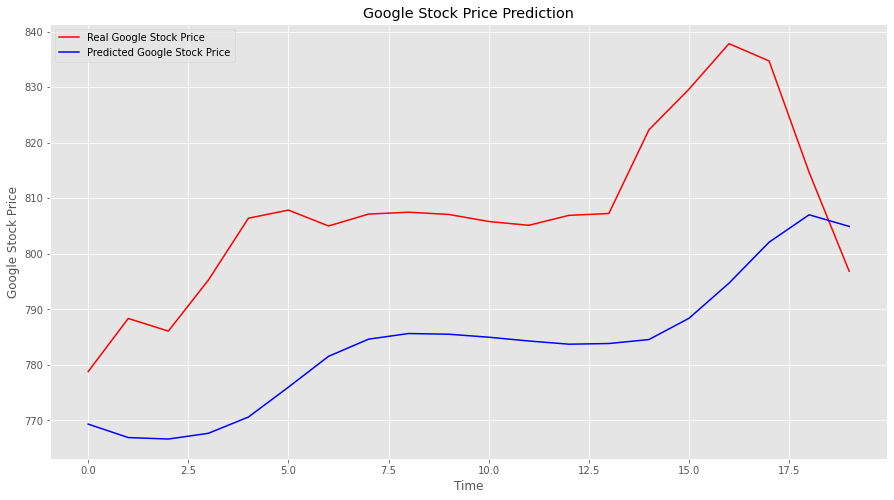

In [28]:
# Vizualizing the Trends
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.style.use('ggplot')
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [30]:
# Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

26.55624346119813
